# Lesson 3 Practical Application

## Noah Miller

In [1]:
from datascience import *
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#### In the next cell I will find the number of seconds in between 1 June at 1200 and 14 August at 0930.

In [3]:
first_date = datetime.datetime(2016, 6, 1, 12)
second_date = datetime.datetime(2016, 8, 14, 9, 30)
difference = (second_date-first_date).total_seconds()
print(difference)

6384600.0


#### In the next cells I will read in a dataset about the world population over time and then I will find the world's population in 2015, find the increase in population between 1950 and 2015, and find the average change between these two years.

In [4]:
world_pop = Table.read_table('world_population.csv')

In [5]:
pops = world_pop.column(0)
print(pops)

[2557628654 2594939877 2636772306 2682053389 2730228104 2782098943
 2835299673 2891349717 2948137248 3000716593 3043001508 3083966929
 3140093217 3209827882 3281201306 3350425793 3420677923 3490333715
 3562313822 3637159050 3712697742 3790326948 3866568653 3942096442
 4016608813 4089083233 4160185010 4232084578 4304105753 4379013942
 4451362735 4534410125 4614566561 4695736743 4774569391 4856462699
 4940571232 5027200492 5114557167 5201440110 5288955934 5371585922
 5456136278 5538268316 5618682132 5699202985 5779440593 5857972543
 5935213248 6012074922 6088571383 6165219247 6242016348 6318590956
 6395699509 6473044732 6551263534 6629913759 6709049780 6788214394
 6866332358 6944055583 7022349283 7101027895 7178722893 7256490011]


In [6]:
number_of_years = len(pops)
print(number_of_years)

66


In [7]:
pop_1950 = pops[0]
pop_2015 = pops[number_of_years - 1]
pop_growth = pop_2015 - pop_1950
ave_pop_growth = pop_growth/(number_of_years - 1)
print(pop_2015)
print(pop_growth)
print(ave_pop_growth)

7256490011
4698861357
72290174.72307692


#### Now I will import a dataset on the Titanic to do some analysis on it.

In [2]:
titanic_data = Table.read_table('train.csv')

#### I will know relabel the pclass column to passenger_classs

In [3]:
titanic_data.relabeled('Pclass', 'passenger_class')

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


#### I will now create a new column that adds SibSp with Parch to find the family size for each passenger.

In [4]:
titanic_data.with_column('family_size', titanic_data['SibSp'] + titanic_data['Parch'])

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


#### Now I will create a bar graph of the number of passengers in each class.

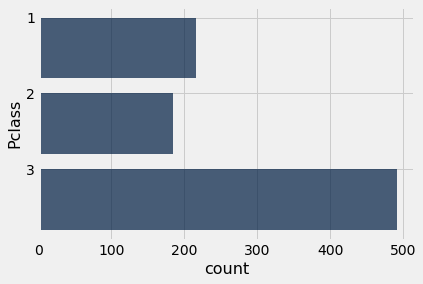

In [5]:
titanic_class = titanic_data.group('Pclass')
titanic_class.barh('Pclass')

#### Now I will sort the data by age and show the youngest 5 passengers.

In [6]:
titanic_age_young = titanic_data.sort('Age')
print(titanic_age_young.column('Age')[0:5])

[0.42 0.67 0.75 0.75 0.83]


#### I will now do the same but for the 5 oldest passengers.

In [7]:
titanic_age_old = titanic_data.sort('Age', descending=True)
titanic_oldest = titanic_age_old.where('Age', are.above(0)).column('Age')
print(titanic_oldest[0:5])

[80.  74.  71.  71.  70.5]


#### Now I will find the percentage of each class that survived.

In [8]:
titanic_survived = titanic_data.select('Survived','Pclass').group('Pclass', collect=sum).column('Survived sum')
titanic_percent = (titanic_survived / titanic_class.column('count')) * 100
print("In the first class " + str(titanic_percent[0])[0:5] + "% survived.")
print("In the second class " + str(titanic_percent[1])[0:5] + "% survived.")
print("In the third class " + str(titanic_percent[2])[0:5] + "% survived.")

In the first class 62.96% survived.
In the second class 47.28% survived.
In the third class 24.23% survived.


#### Now I will find what percentage survived based on gender.

In [26]:
titanic_survived_gender = titanic_data.select('Survived', 'Sex').group('Sex', collect=sum)
titanic_gender_percent = (titanic_survived_gender.column('Survived sum') / titanic_data.group('Sex').column('count')) * 100
print(titanic_survived_gender)
print(str(titanic_gender_percent[0])[0:5] + '% of women survived')
print(str(titanic_gender_percent[1])[0:5] + '% of men survived')

Sex    | Survived sum
female | 233
male   | 109
74.20% of women survived
18.89% of men survived


In [29]:
titanic_survived_gender.with_columns('Total', sum('Sex'))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

#### Now I will find the average age on the titanic.

In [24]:
titanic_ages = titanic_data.where('Age', are.above(0)).column('Age')
number_of_ages = len(titanic_ages)
average_age = sum(titanic_ages) / number_of_ages
print("The average age was " + str(average_age)[0:4])

The average age was 29.6
